# Customer Churn Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    PowerTransformer
)
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_importance

## Importing and preprocessing the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Statistical Machine Learning/Homework 4/BankChurners.csv')

In [ ]:
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [ ]:
df.shape

(10127, 21)

In [ ]:
#checking for unique and null values
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
CLIENTNUM,int64,10127,0
Attrition_Flag,object,2,0
Customer_Age,int64,45,0
Gender,object,2,0
Dependent_count,int64,6,0
Education_Level,object,7,0
Marital_Status,object,4,0
Income_Category,object,6,0
Card_Category,object,4,0
Months_on_book,int64,44,0


In [ ]:
#any duplicated values
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


There are no duplicate values or null values in the dataset. Looking at the summary of the quantitative columns, there does not seem to be any implausible values

In [ ]:
#each row is a unique customer so dropping clientnum column as it is not required for understanding
df.drop('CLIENTNUM', axis=1, inplace=True)

In [ ]:
df[df['Marital_Status'] == 'Unknown']['Marital_Status'].count() #keeping unknown marital status as families not willing to disclose marital status could behave differently

np.int64(749)

In [ ]:
df['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [ ]:
#considering in general credit card is highly dependent on income, so chosen to exclude unknown income clients for better clustering
df = df[df['Income_Category'] != 'Unknown']

In [ ]:
df['Education_Level'].value_counts() #keeping unknown education clients as they could behave differently

,count
Education_Level,
Graduate,2796
High School,1788
Unknown,1374
Uneducated,1302
College,905
Post-Graduate,469
Doctorate,381


## Visualizations

In [ ]:
#splitting data into train and test set
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['Attrition_Flag'], #imbalanced dataset so using stratify so class proportions are preserved
    random_state=42
)

In [ ]:
def plot_numerical_features(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    n = len(numerical_cols)
    n_rows = n
    fig, axes = plt.subplots(n_rows, 2, figsize=(18, 4 * n_rows))

    for i, col in enumerate(numerical_cols):
        sns.histplot(df[col], kde=True, ax=axes[i, 0], color='slateblue')
        axes[i, 0].set_title(col)

        sns.boxplot(x=df[col], ax=axes[i, 1], color='mediumpurple')
        axes[i, 1].set_title(f'{col} (Boxplot)')

    plt.tight_layout()
    plt.show()

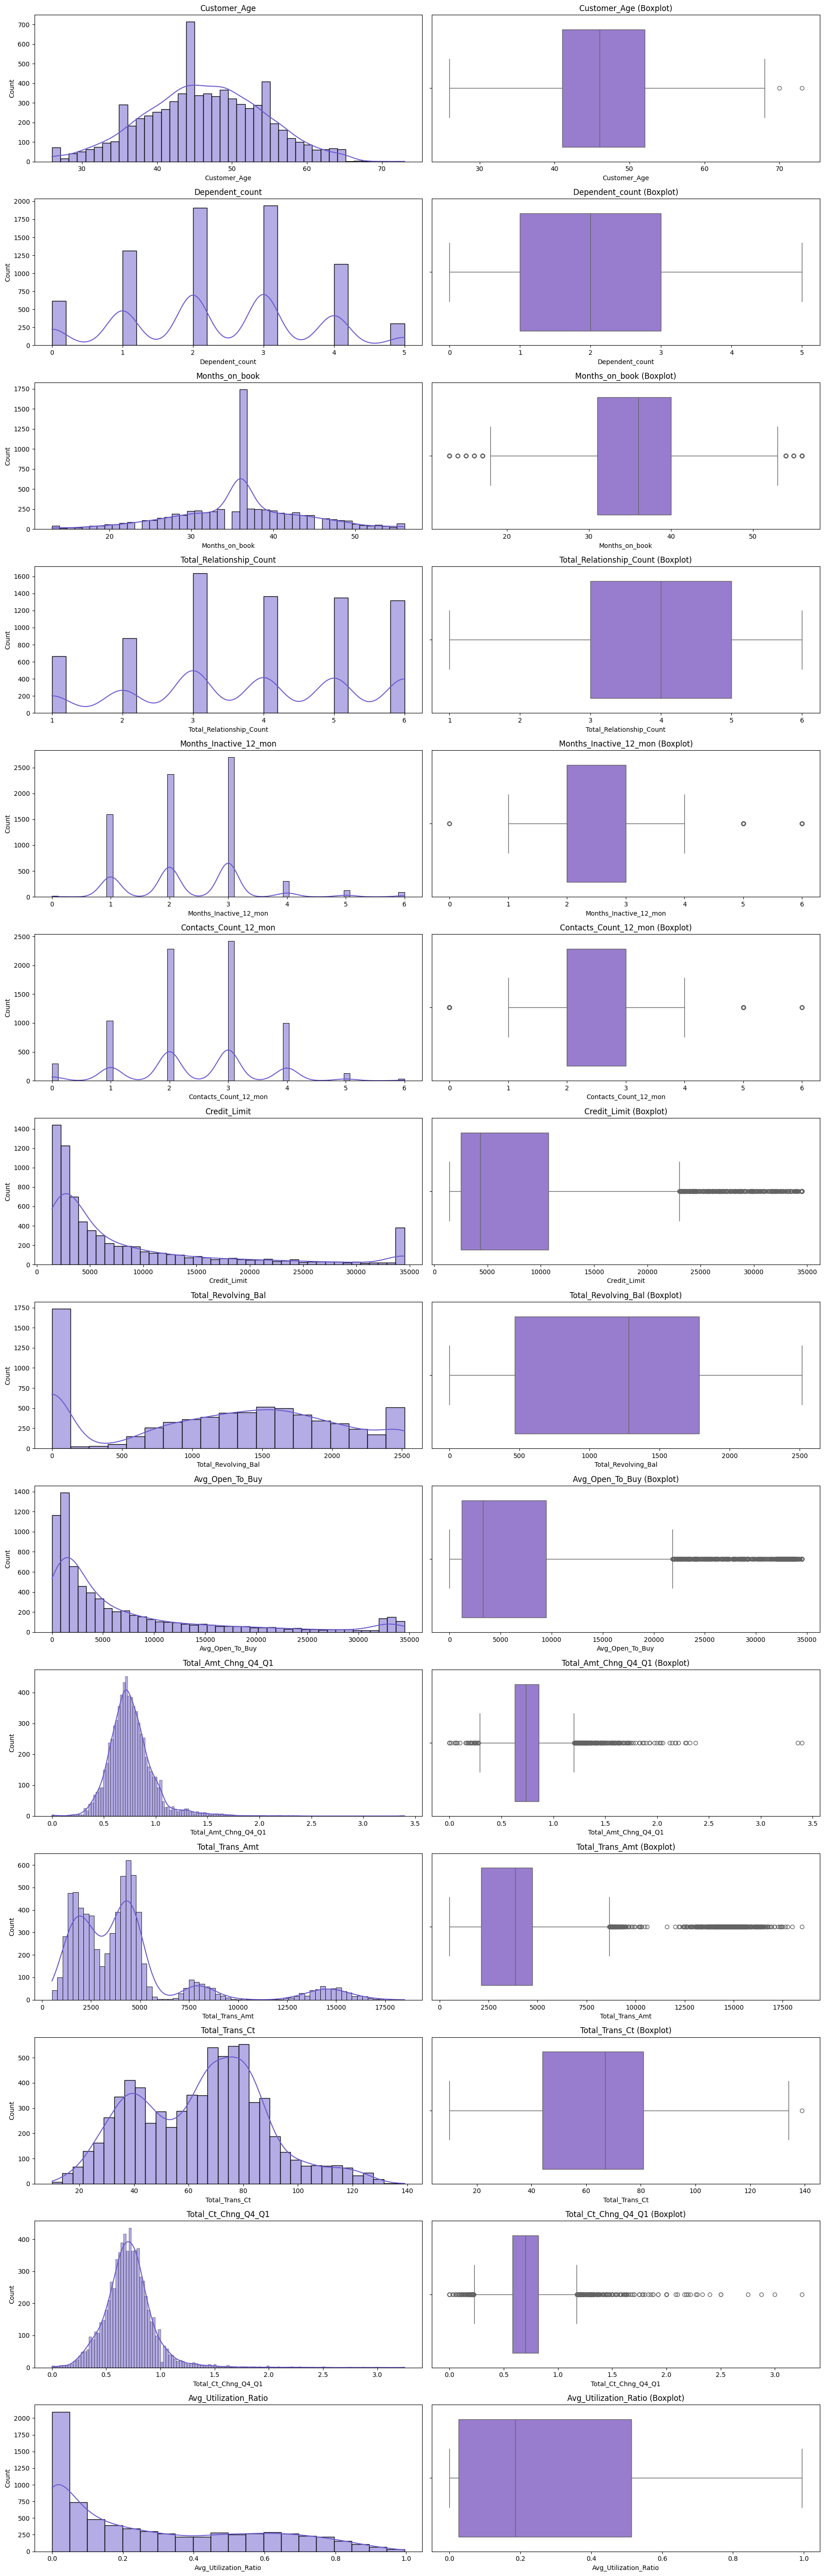

In [ ]:
plot_numerical_features(train_df)

In [ ]:
train_df_dummies = pd.get_dummies(train_df, drop_first=True)
test_df_dummies = pd.get_dummies(test_df, drop_first=True)

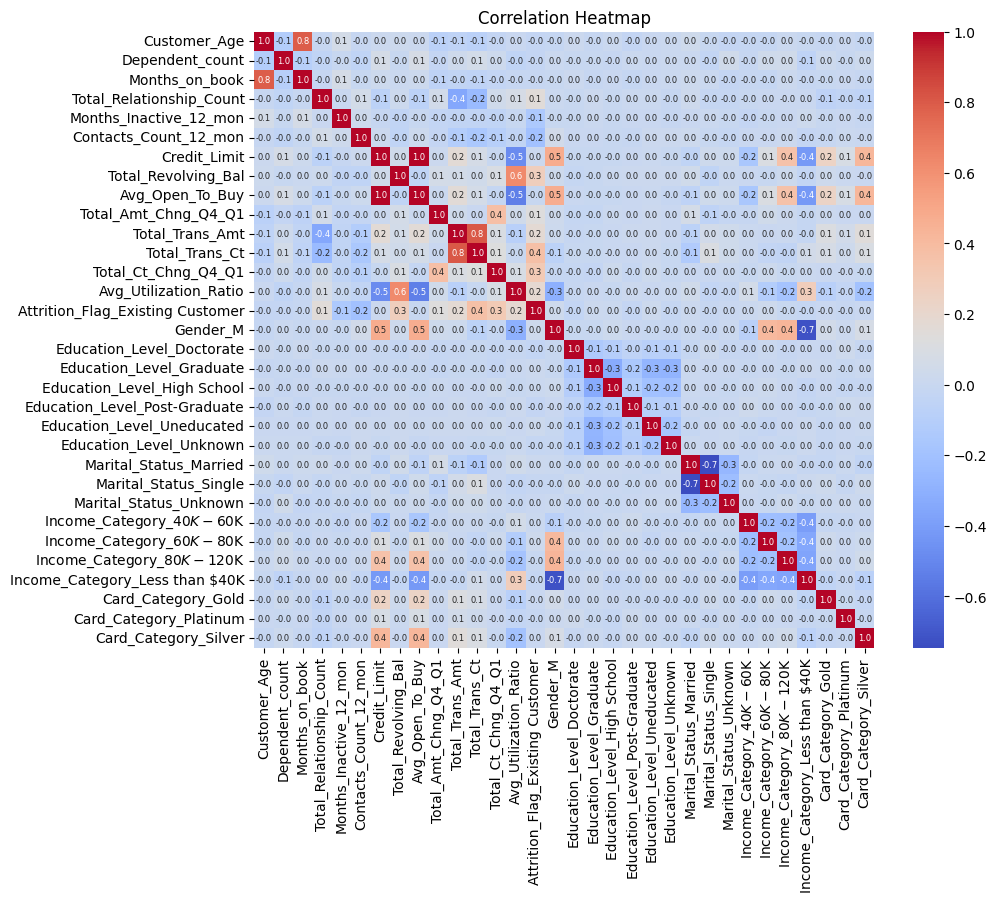

In [ ]:
#plot correlation map
plt.figure(figsize=(10, 8))
sns.heatmap(train_df_dummies.corr(), annot=True, cmap='coolwarm', fmt='.1f', annot_kws={'size': 6})
plt.title('Correlation Heatmap')
plt.show()

Avg_open_to_buy and Credit Limit has a correlation of 1.0 so it would be redundant to keep both of them so we decide to keep Credit Limit.

In [ ]:
train_df_drop = train_df.drop(['Avg_Open_To_Buy'], axis=1)
test_df_drop = test_df.drop(['Avg_Open_To_Buy'], axis=1)
train_df_dummies_drop = train_df_dummies.drop(['Avg_Open_To_Buy'], axis=1)
test_df_dummies_drop = test_df_dummies.drop(['Avg_Open_To_Buy'], axis=1)

In [ ]:
#removing the outliers from Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1
train_df_drop = train_df_drop[train_df_drop['Total_Amt_Chng_Q4_Q1'] <= 2.5]
train_df_drop = train_df_drop[train_df_drop['Total_Ct_Chng_Q4_Q1'] <= 2.5]

In [ ]:
X_train = train_df_drop.drop('Attrition_Flag', axis=1)
y_train = train_df_drop['Attrition_Flag']

In [ ]:
one_hot_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category',
    'Dependent_count',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
]

standard_cols = [
    'Customer_Age',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Ct_Chng_Q4_Q1',
    'Months_on_book',
    'Total_Trans_Ct'
]

power_cols = [
    'Total_Revolving_Bal',
    'Credit_Limit',
    'Avg_Utilization_Ratio',
    'Total_Trans_Amt'
]

In [ ]:
preprocessing = ColumnTransformer(
    [
        ('one-hot', OneHotEncoder(), one_hot_cols),
        ('standard', StandardScaler(), standard_cols),
        ('power', PowerTransformer(), power_cols),
    ]
)

X_train_transform = preprocessing.fit_transform(X_train)

Best K: 4 with silhouette score: 0.1034


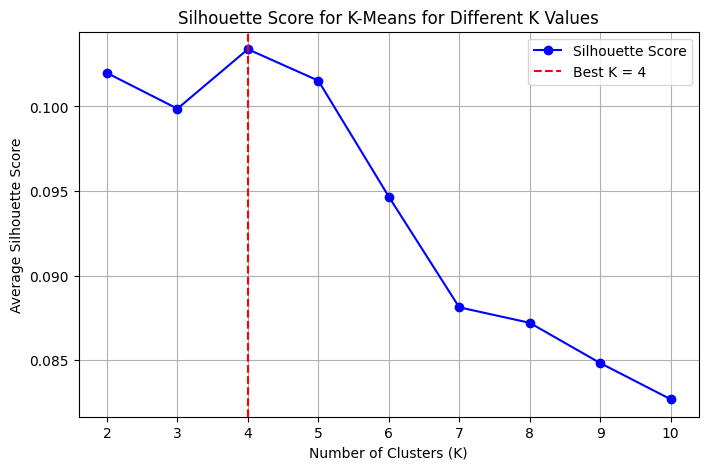

In [ ]:
ave_silhouette_kmeans = {}

K = 10
for i in range(2, K + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_transform)
    silhouette_vals = silhouette_samples(X_train_transform, cluster_labels)
    ave_silhouette_kmeans[i] = np.mean(silhouette_vals)

# Get best K
best_k = max(ave_silhouette_kmeans, key=ave_silhouette_kmeans.get)
print(f'Best K: {best_k} with silhouette score: {ave_silhouette_kmeans[best_k]:.4f}')

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(
    list(ave_silhouette_kmeans.keys()),
    list(ave_silhouette_kmeans.values()),
    marker='o',
    linestyle='-',
    color='b',
    label='Silhouette Score'
)
plt.axvline(best_k, color='r', linestyle='--', label=f'Best K = {best_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for K-Means for Different K Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#perform Kmeans using best k
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_train_transform)

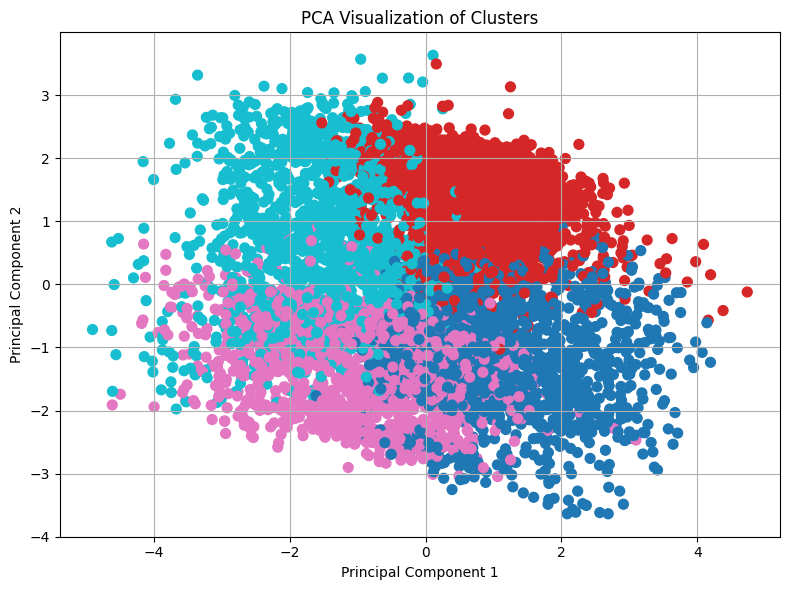

In [ ]:
#reduce to 2D using PCA since there are multiple columns
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_transform)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0],X_pca[:, 1], c=clusters, cmap='tab10', s=50)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X_train_kmeans = X_train.copy()
X_train_kmeans['cluster'] = clusters

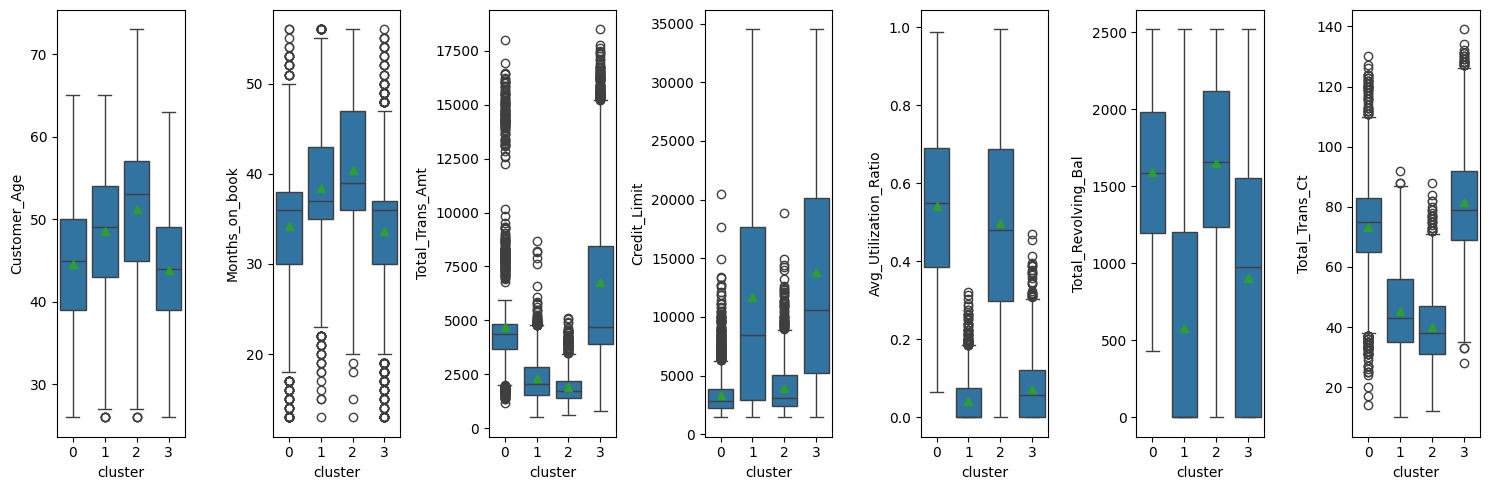

In [ ]:
columns_analysis = [
    'Customer_Age',
    'Months_on_book',
    'Total_Trans_Amt',
    'Credit_Limit',
    'Avg_Utilization_Ratio',
    'Total_Revolving_Bal',
    'Total_Trans_Ct'
]

fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(15, 5), tight_layout=True)

for ax, col in zip(axs, columns_analysis):
    sns.boxplot(x='cluster', y=col, data=X_train_kmeans, ax=ax, showmeans=True)

In [ ]:
def plot_columns_percent_by_cluster(
    dataframe,
    column,
    order=None,
    palette=None,
    cluster_col = 'cluster',
    figsize=(8, 5)
):
    '''
    Plots a stacked percentage bar chart for a categorical feature by cluster.

    Parameters:
    - dataframe: pd.DataFrame with clustering and categorical column
    - column: str, name of categorical column to plot
    - order: list, custom order of categories
    - figsize: tuple, figure size
    '''

    ct = pd.crosstab(dataframe[cluster_col], dataframe[column], normalize='index') * 100

    if order:
        ct = ct[order]


    ax = ct.plot(kind='bar', stacked=True, figsize=figsize, color=palette, edgecolor='black')


    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, color='white')

    plt.title(f'{column} Distribution by {cluster_col}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(cluster_col)
    plt.xticks(rotation=0)
    plt.ylim(0, 100)
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

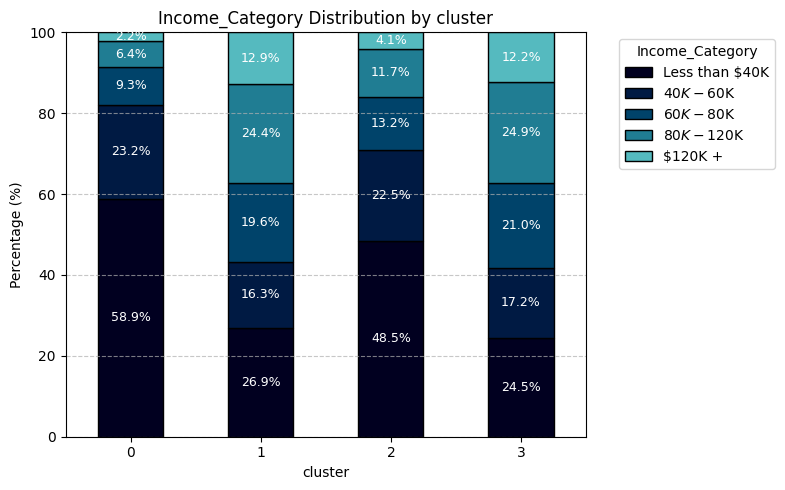

In [ ]:
plot_columns_percent_by_cluster(
    dataframe=X_train_kmeans,
    column='Income_Category',
    order=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],
    palette=['#010020', '#001a43', '#00436a', '#207d93', '#55babf']
)

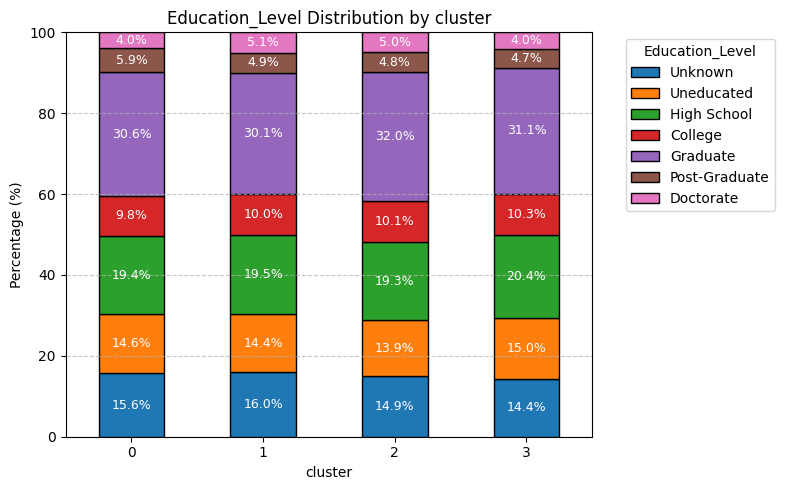

In [ ]:
plot_columns_percent_by_cluster(
    dataframe=X_train_kmeans,
    column='Education_Level',
    order = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
)

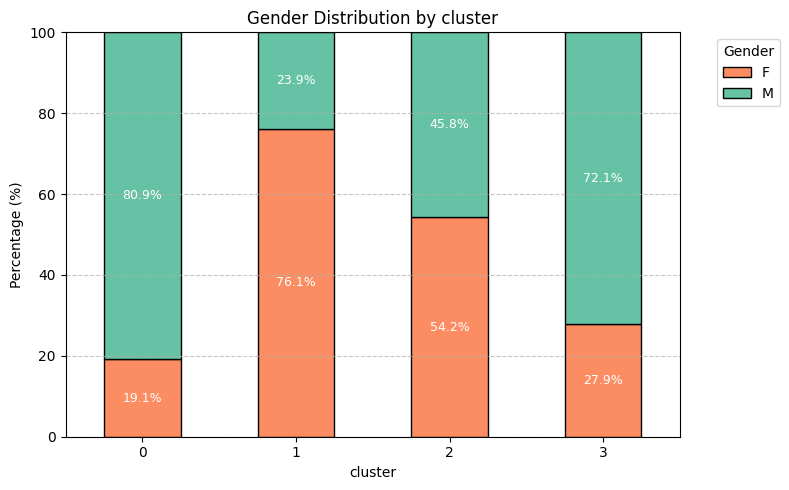

In [ ]:
plot_columns_percent_by_cluster(
    dataframe=X_train_kmeans,
    column='Gender',
    order=['F', 'M'],
    palette=['#fc8d62', '#66c2a5']
)

In [ ]:
train_df_kmeans = train_df_drop.copy()
train_df_kmeans['cluster'] = clusters

In [ ]:
train_df_kmeans.groupby('cluster')['Attrition_Flag'].value_counts(normalize = True)

cluster  Attrition_Flag   
0        Existing Customer    0.936994
         Attrited Customer    0.063006
1        Existing Customer    0.933389
         Attrited Customer    0.066611
2        Existing Customer    0.618504
         Attrited Customer    0.381496
3        Existing Customer    0.812291
         Attrited Customer    0.187709
Name: proportion, dtype: float64

## Model Building

In [ ]:
y_train = train_df_drop['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [ ]:
#Logistic Regression
pipeline_logreg = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])


param_grid = {
    'classifier__C': np.logspace(-4, 4, 5)
}

grid_search = GridSearchCV(pipeline_logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

Best parameters: {'classifier__C': np.float64(10000.0)}


In [ ]:
X_test = test_df_drop.drop('Attrition_Flag', axis=1)
y_test = test_df_drop['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [ ]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print('ROC AUC:', roc_auc_score(y_test, y_proba))

ROC AUC: 0.9262972130546387


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1515
           1       0.55      0.84      0.67       288

    accuracy                           0.87      1803
   macro avg       0.76      0.86      0.79      1803
weighted avg       0.90      0.87      0.88      1803



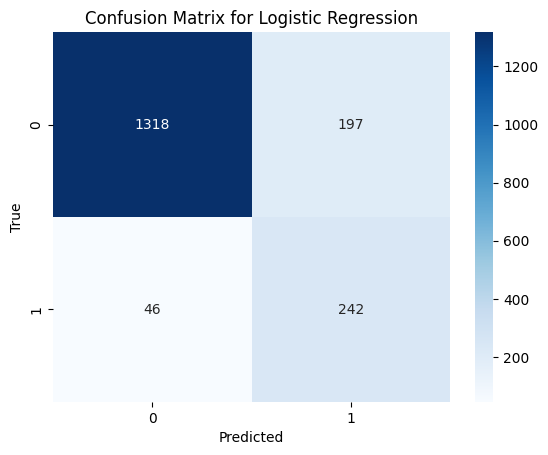

In [ ]:
#confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [5, 10, 15],
    'classifier__class_weight': ['balanced']
}


grid_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('one-hot',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Education_Level',
                                                                          'Marital_Status',
                                                                          'Income_Category',
                                                                          'Card_Category',
                                                                          'Dependent_count',
                                                                          'Total_Relationship_Count',
                                                                          'Months_Inactive_12_mon',
                                                                          'Contacts_Count_12_mon']),
                                                                        ('standard',
                                                                         StandardScaler(),
                                                                         ['Customer_Age',
                                                                          'Total_Amt...
                                                                         PowerTransformer(),
                                                                         ['Total_Revolving_Bal',
                                                                          'Credit_Limit',
                                                                          'Avg_Utilization_Ratio',
                                                                          'Total_Trans_Amt'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced'],
                         'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [5, 10, 15],
                         'classifier__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [ ]:
best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
print('ROC AUC:', roc_auc_score(y_test, y_proba_rf))

ROC AUC: 0.9804065823248992


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1515
           1       0.86      0.71      0.78       288

    accuracy                           0.94      1803
   macro avg       0.90      0.85      0.87      1803
weighted avg       0.93      0.94      0.93      1803



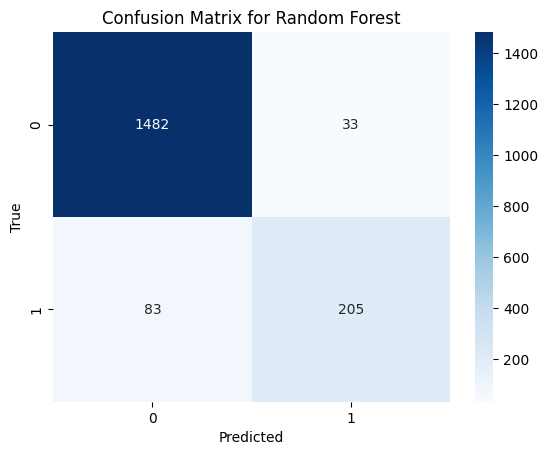

In [ ]:
#confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#XGBoost
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__scale_pos_weight': [1, 4]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('one-hot',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Education_Level',
                                                                          'Marital_Status',
                                                                          'Income_Category',
                                                                          'Card_Category',
                                                                          'Dependent_count',
                                                                          'Total_Relationship_Count',
                                                                          'Months_Inactive_12_mon',
                                                                          'Contacts_Count_12_mon']),
                                                                        ('standard',
                                                                         StandardScaler(),
                                                                         ['Customer_Age',
                                                                          'Total_Amt...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 6],
                         'classifier__n_estimators': [100, 200],
                         'classifier__scale_pos_weight': [1, 4]},
             scoring='roc_auc', verbose=1)

In [ ]:
best_xgb = grid_search.best_estimator_

y_pred_xg = best_xgb.predict(X_test)
y_proba_xg = best_xgb.predict_proba(X_test)[:, 1]

In [ ]:
print('ROC AUC:', roc_auc_score(y_test, y_proba_xg))

ROC AUC: 0.992668225155849


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred_xg))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1515
           1       0.93      0.86      0.89       288

    accuracy                           0.97      1803
   macro avg       0.95      0.92      0.94      1803
weighted avg       0.97      0.97      0.97      1803



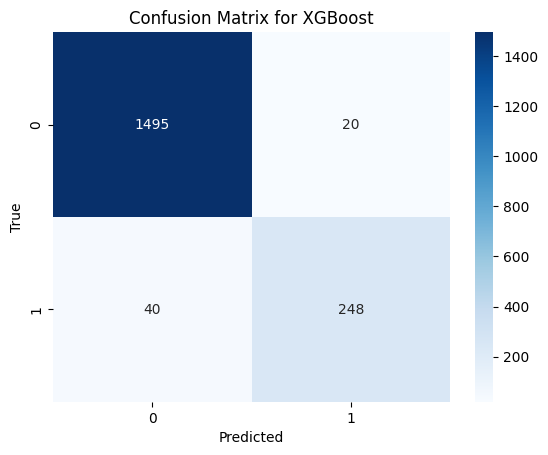

In [ ]:
cm_xg = confusion_matrix(y_test, y_pred_xg)

sns.heatmap(cm_xg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<Figure size 1000x600 with 0 Axes>

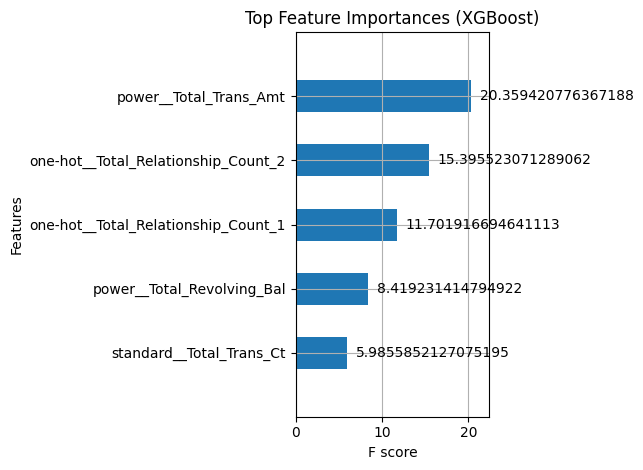

In [ ]:
feature_names = best_xgb.named_steps['preprocessing'].get_feature_names_out()

importances = best_xgb.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_5_features = importance_df['Feature'].head(5).tolist()

booster = best_xgb.named_steps['classifier']

plt.figure(figsize=(10,6))
plot_importance(booster, importance_type='gain',
                show_values=True, height=0.5,
                xlabel='F score', title='Top Feature Importances (XGBoost)', max_num_features = 5)
plt.yticks(range(len(top_5_features)), top_5_features)

plt.tight_layout()
plt.show()